In [13]:
# ----------------------------------------------- #
# Import & Load CSVs
# ----------------------------------------------- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

woodside_df = pd.read_csv('./data/2023/cleaned/456/456_61St-Woodside_2023_cleaned.csv')
bryant_df = pd.read_csv('./data/2023/cleaned/609/609_BryantPk5Av_2023_cleaned.csv')

all_df = pd.concat([woodside_df, bryant_df])


Text(0.5, 0.98, 'Total subway turnstile entrances on days of the week in 2023')

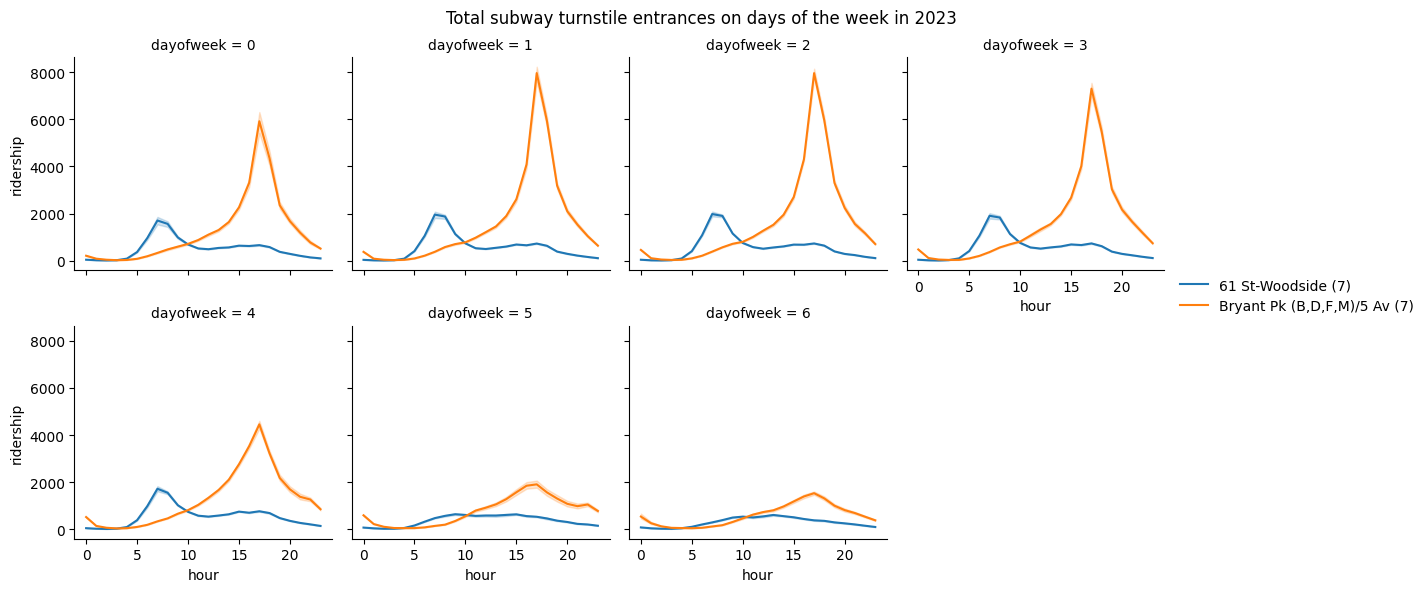

In [20]:
# ----------------------------------------------- #
# Graph Both
# ----------------------------------------------- #

g = sns.FacetGrid(all_df, col="dayofweek", col_wrap=4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership", hue="station_complex")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total subway turnstile entrances on days of the week in 2023')

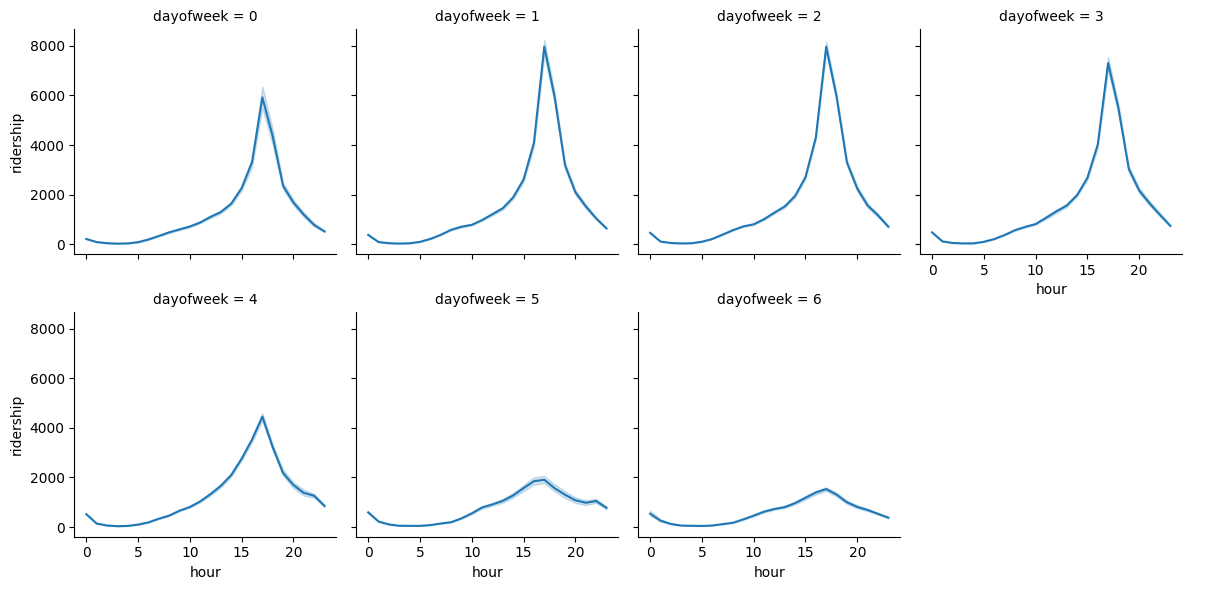

In [12]:
# ----------------------------------------------- #
# Graph Just One
# ----------------------------------------------- #

g = sns.FacetGrid(bryant_df, col="dayofweek", col_wrap=4)
g.map_dataframe(sns.lineplot, x="hour", y="ridership")
g.add_legend()

In [15]:
all_df[:10]

,transit_timestamp,year,month,day,dayofweek,hour,ridership,transfers,station_complex_id,station_complex,borough
0,2023-01-01 00:00:00,2023,1,1,6,0,85.0,0.0,456,61 St-Woodside (7),Queens
1,2023-01-01 01:00:00,2023,1,1,6,1,113.0,2.0,456,61 St-Woodside (7),Queens
2,2023-01-01 02:00:00,2023,1,1,6,2,80.0,0.0,456,61 St-Woodside (7),Queens
3,2023-01-01 03:00:00,2023,1,1,6,3,41.0,0.0,456,61 St-Woodside (7),Queens
4,2023-01-01 04:00:00,2023,1,1,6,4,63.0,0.0,456,61 St-Woodside (7),Queens
5,2023-01-01 05:00:00,2023,1,1,6,5,74.0,1.0,456,61 St-Woodside (7),Queens
6,2023-01-01 06:00:00,2023,1,1,6,6,134.0,3.0,456,61 St-Woodside (7),Queens
7,2023-01-01 07:00:00,2023,1,1,6,7,206.0,5.0,456,61 St-Woodside (7),Queens
8,2023-01-01 08:00:00,2023,1,1,6,8,240.0,12.0,456,61 St-Woodside (7),Queens
9,2023-01-01 09:00:00,2023,1,1,6,9,330.0,11.0,456,61 St-Woodside (7),Queens
